In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/data_final.csv')

In [ ]:
data

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0.0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0.0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0.0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0.0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0.0
...,...,...,...,...,...,...,...,...,...,...
320035,104,'C1687101094','2','F','28007','M1823072687','28007','es_transportation',16.22,0.0
320036,104,'C1242334684','2','M','28007','M1823072687','28007','es_transportation',20.68,0.0
320037,104,'C904725981','1','F','28007','M692898500','28007','es_health',91.11,0.0
320038,104,'C904725981','1','F','28007','M50039827','28007','es_health',118.25,0.0


###EDA

In [ ]:
## As can be seen, there are NaNs in dataset
## Fortunately, they are all in the same row number 115517

data.isna().sum()

step           0
customer       1
age            1
gender         1
zipcodeOri     1
merchant       1
zipMerchant    1
category       1
amount         1
fraud          1
dtype: int64

In [98]:
## Several rows have no information about age

data[data['age'] == 'U'].shape

(0, 10)

In [99]:
## Several rows have no information about gender

data[data['gender'] == 'U'].shape

(0, 10)

In [ ]:
## There are several columns with values of type object
## Two columns with values of type float
## One column with values of type int

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320040 entries, 0 to 320039
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         320040 non-null  int64  
 1   customer     320039 non-null  object 
 2   age          320039 non-null  object 
 3   gender       320039 non-null  object 
 4   zipcodeOri   320039 non-null  object 
 5   merchant     320039 non-null  object 
 6   zipMerchant  320039 non-null  object 
 7   category     320039 non-null  object 
 8   amount       320039 non-null  float64
 9   fraud        320039 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 24.4+ MB


In [ ]:
## Max step is 104, it says that data nearly for 3.5 months
## Great difference between mean and median in amount shows
## That there are a lot of rows with big amount 
## It can be seen that there are not so many fraudsters
## Because of low mean value 

data.describe()

,step,amount,fraud
count,320040.000000,320039.000000,320039.000000
mean,54.514714,38.493266,0.013048
std,29.808899,117.689551,0.113482
min,0.000000,0.000000,0.000000
25%,29.000000,13.740000,0.000000
50%,56.000000,26.920000,0.000000
75%,80.000000,42.585000,0.000000
max,104.000000,7665.560000,1.000000


<Axes: >

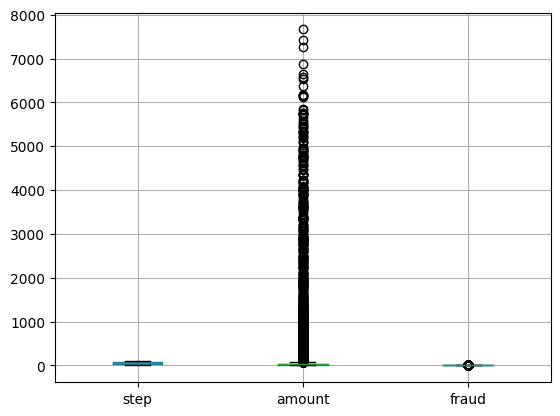

In [ ]:
## Really interesting to see a lot of outliers in column "amount"

data.boxplot()

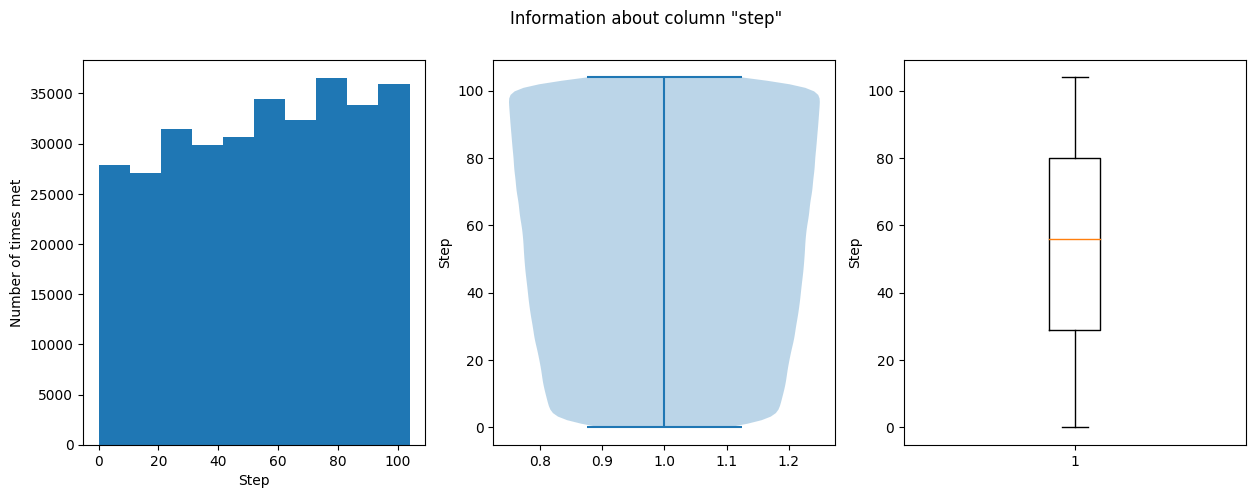

In [ ]:
## Number of met steps raises slowly
## Distribution of column "step" has no outliers
## It can be seen by violinplot that values are really dense
## So close to each other and have nearly the same number of times met

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

plt.suptitle('Information about column "step"')
axes[0].hist(
    data['step']
)

axes[0].set_xlabel('Step')
axes[0].set_ylabel('Number of times met')

axes[1].violinplot(
    data['step']
)
axes[1].set_ylabel('Step')

axes[2].boxplot(
    data['step']
)
axes[2].set_ylabel('Step')

plt.show()

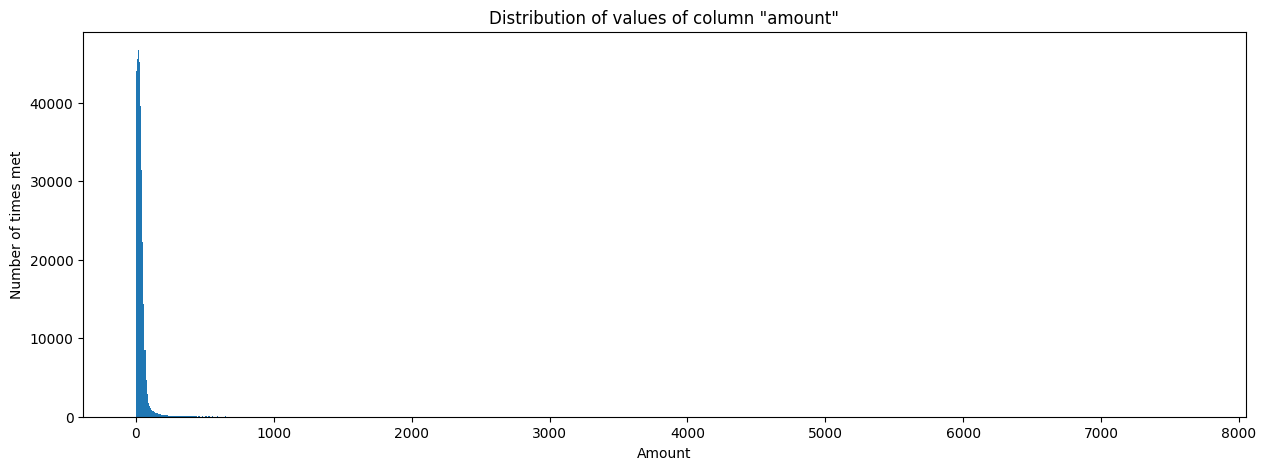

In [ ]:
## It can be seen exponential distribution of values
## Long x-axis because of great amount of outliers

fig, axes = plt.subplots(1, 1, figsize=(15, 5))

plt.hist(
    data['amount'],
    bins = 1000
)
plt.xlabel('Amount')
plt.ylabel('Number of times met')
plt.title('Distribution of values of column "amount"')
plt.show()

In [ ]:
## Age has several categories (from 0 to 6 and U)
## It is an ordinal column

data['age'].value_counts()

'2'    101116
'3'     78715
'4'     58527
'5'     33911
'1'     31525
'6'     14446
'0'      1197
'U'       602
Name: age, dtype: int64

Text(0.5, 1.0, 'Distribution of values of column "Age"')

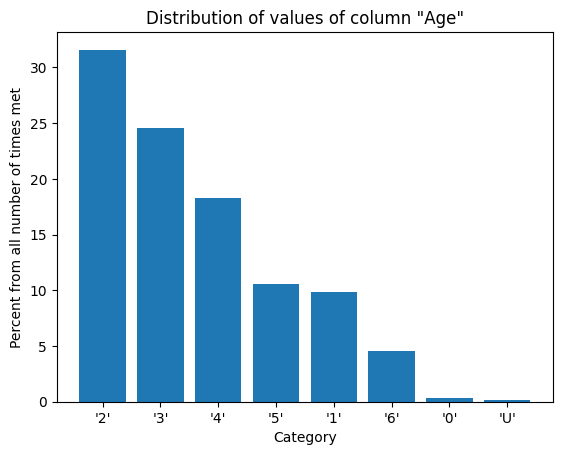

In [ ]:
## There are several unknown

plt.bar(
    data['age'].value_counts().reset_index()['index'],
    data['age'].value_counts().reset_index()['age'] * 100 / np.sum(
        data['age'].value_counts().reset_index()['age']
    ),
)

plt.xlabel('Category')
plt.ylabel('Percent from all number of times met')
plt.title('Distribution of values of column "Age"')

Text(0.5, 1.0, 'Distribution of values of column "category"')

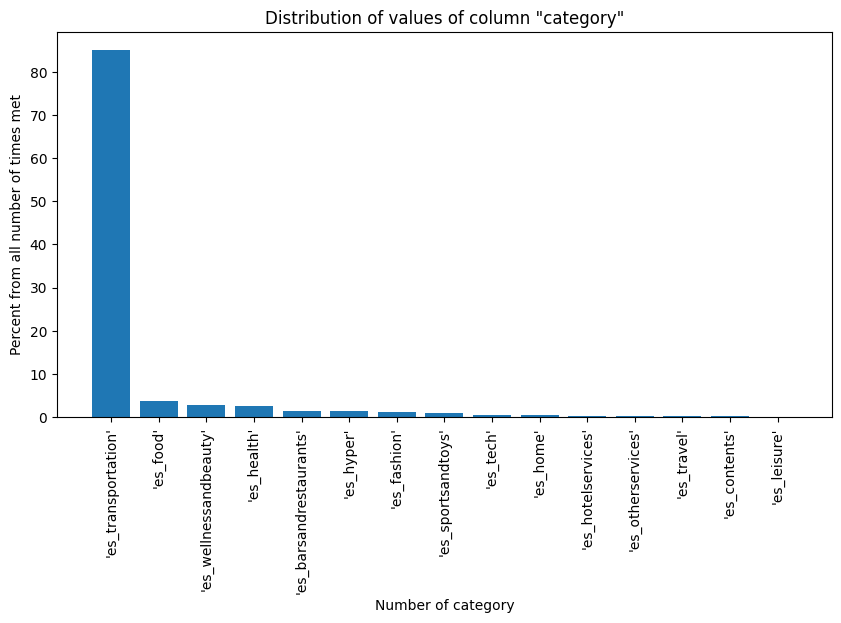

In [ ]:
## Main type is transportation

plt.figure(figsize=(10, 5))

plt.bar(
    data['category'].value_counts().reset_index()['index'],
    data['category'].value_counts().reset_index()['category'] *100/ np.sum(
        data['category'].value_counts().reset_index()['category']
    ),
)

plt.xlabel('Number of category')
plt.ylabel('Percent from all number of times met')
plt.xticks(rotation=90)
plt.title('Distribution of values of column "category"')

Text(0.5, 1.0, 'Distribution of values of column "gender"')

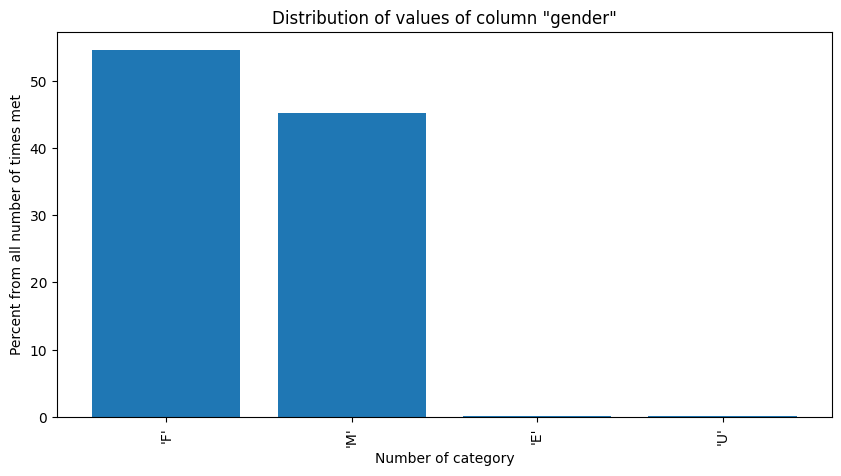

In [ ]:
## Mainly are men or women, but sometimes enterprises
## Also there are several unknown 

plt.figure(figsize=(10, 5))

plt.bar(
    data['gender'].value_counts().reset_index()['index'],
    data['gender'].value_counts().reset_index()['gender'] *100/ np.sum(
        data['gender'].value_counts().reset_index()['gender']
    ),
)

plt.xlabel('Number of category')
plt.ylabel('Percent from all number of times met')
plt.xticks(rotation=90)
plt.title('Distribution of values of column "gender"')

In [78]:
data

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0.0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0.0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0.0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0.0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0.0
...,...,...,...,...,...,...,...,...,...,...
320035,104,'C1687101094','2','F','28007','M1823072687','28007','es_transportation',16.22,0.0
320036,104,'C1242334684','2','M','28007','M1823072687','28007','es_transportation',20.68,0.0
320037,104,'C904725981','1','F','28007','M692898500','28007','es_health',91.11,0.0
320038,104,'C904725981','1','F','28007','M50039827','28007','es_health',118.25,0.0


Text(0.5, 1.0, 'Distribution of top-20 customers')

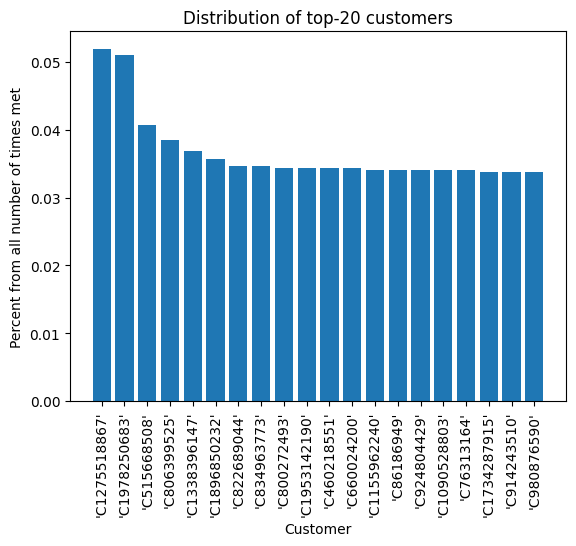

In [80]:
## The most frequent customers are less than 0.05% from all

plt.bar(
    data['customer'].value_counts().reset_index()['index'][:20],
    data['customer'].value_counts().reset_index()['customer'][:20] *100/ np.sum(
        data['customer'].value_counts().reset_index()['customer']
    ),
)

plt.xlabel('Customer')
plt.ylabel('Percent from all number of times met')
plt.xticks(rotation=90)
plt.title('Distribution of top-20 customers')

In [81]:
data

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0.0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0.0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0.0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0.0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0.0
...,...,...,...,...,...,...,...,...,...,...
320035,104,'C1687101094','2','F','28007','M1823072687','28007','es_transportation',16.22,0.0
320036,104,'C1242334684','2','M','28007','M1823072687','28007','es_transportation',20.68,0.0
320037,104,'C904725981','1','F','28007','M692898500','28007','es_health',91.11,0.0
320038,104,'C904725981','1','F','28007','M50039827','28007','es_health',118.25,0.0


Text(0.5, 1.0, 'Distribution of top-20 merchant')

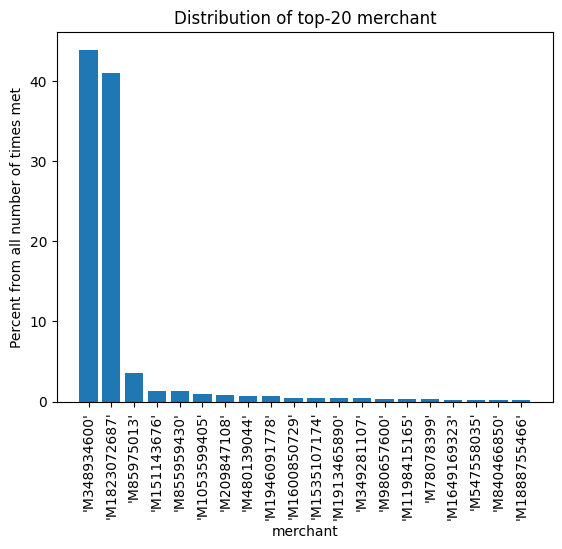

In [84]:
## From the other side, among merchants there are two most popular
## Their part of transactions is nearly 85% from all merchants

plt.bar(
    data['merchant'].value_counts().reset_index()['index'][:20],
    data['merchant'].value_counts().reset_index()['merchant'][:20] *100/ np.sum(
        data['merchant'].value_counts().reset_index()['merchant']
    ),
)

plt.xlabel('merchant')
plt.ylabel('Percent from all number of times met')
plt.xticks(rotation=90)
plt.title('Distribution of top-20 merchant')

In [85]:
## In this table can be seen that the most frequent pairs customer-merchant
## Has nearly 100 interactions about buying-selling

data[['customer', 'merchant']].value_counts()

customer       merchant     
'C1853381059'  'M348934600'     98
'C1450562088'  'M348934600'     97
'C311783581'   'M1823072687'    96
'C185820405'   'M1823072687'    95
'C1424475955'  'M348934600'     95
                                ..
'C1827713539'  'M1600850729'     1
'C1827331929'  'M85975013'       1
               'M209847108'      1
               'M1600850729'     1
'C999723254'   'M85975013'       1
Length: 33400, dtype: int64

Text(0.5, 1.0, 'Distribution of target')

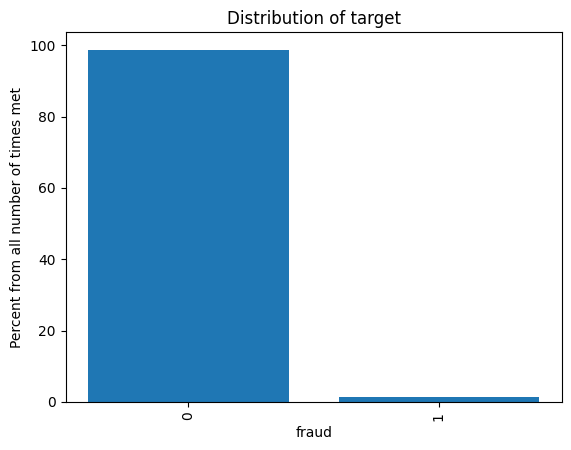

In [91]:
## There can be see great imbalance in categories as in real life
## It will be hard to build model on such dataset, so we will need to do SMOTE
## Or analog 

plt.bar(
    data['fraud'].value_counts().reset_index()['index'],
    data['fraud'].value_counts().reset_index()['fraud'] *100/ np.sum(
        data['fraud'].value_counts().reset_index()['fraud']
    ),
)

plt.xlabel('fraud')
plt.ylabel('Percent from all number of times met')
plt.xticks([0, 1], rotation=90)
plt.title('Distribution of target')